In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt

%matplotlib inline

import os
print(os.listdir('../input/titanic/'))


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['gender_submission.csv', 'test.csv', 'train.csv']


In [2]:
data_train = pd.read_csv('../input/titanic/train.csv')
data_test = pd.read_csv('../input/titanic/test.csv')

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.drop('PassengerId', axis=1, inplace=True)
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
from sklearn.preprocessing import LabelEncoder
data_train['Sex'] = LabelEncoder().fit_transform(data_train['Sex'])
data_test['Sex'] = LabelEncoder().fit_transform(data_test['Sex'])


In [6]:
data_train['Name'] = data_train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = data_train['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [7]:
data_test['Name'] = data_test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles_test = data_test['Name'].unique()
titles_test

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [8]:
data_train['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = data_train.Age[(data_train["Age"] != -1) & (data_train['Name'] == title)].median()
    medians[title] = median

print(medians)

for index, row in data_train.iterrows():
    if row['Age'] == -1:
        data_train.loc[index, 'Age'] = medians[row['Name']]

data_train.head()

{'Mr': 30.0, 'Mrs': 35.0, 'Miss': 21.0, 'Master': 3.5, 'Don': 40.0, 'Rev': 46.5, 'Dr': 46.5, 'Mme': 24.0, 'Ms': 28.0, 'Major': 48.5, 'Lady': 48.0, 'Sir': 49.0, 'Mlle': 24.0, 'Col': 58.0, 'Capt': 70.0, 'the Countess': 33.0, 'Jonkheer': 38.0}


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data_test['Age'].fillna(-1, inplace=True)

# medians_test = dict()
# for title in titles_test:
#     median_test = data_test.Age[(data_test["Age"] != -1) & (data_test['Name'] == title)].median()
#     medians_test[title] = median_test

# print(medians_test)

for index, row in data_test.iterrows():
    if row['Age'] == -1:
        data_test.loc[index, 'Age'] = medians[row['Name']]

data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
replacement = {
    'Don': 0,
    'Dona': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

data_train['Name'] = data_train['Name'].apply(lambda x: replacement.get(x))
data_test['Name'] = data_test['Name'].apply(lambda x: replacement.get(x))

from sklearn.preprocessing import StandardScaler
data_train['Name'] = StandardScaler().fit_transform(data_train['Name'].values.reshape(-1, 1))
data_test['Name'] = StandardScaler().fit_transform(data_test['Name'].values.reshape(-1, 1))

In [11]:
data_train.head()[['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']]

,Pclass,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,3,22.0,1,0,A/5 21171,NaN,S
1,1,38.0,1,0,PC 17599,C85,C
2,3,26.0,0,0,STON/O2. 3101282,NaN,S
3,1,35.0,1,0,113803,C123,S
4,3,35.0,0,0,373450,NaN,S


In [12]:
data_train['Age'] = StandardScaler().fit_transform(data_train['Age'].values.reshape(-1, 1))

In [13]:
data_test['Age'] = StandardScaler().fit_transform(data_test['Age'].values.reshape(-1, 1))

In [14]:
data_train['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in data_train['Pclass'].unique():
    median = data_train.Fare[(data_train["Fare"] != -1) & (data_train['Pclass'] == pclass)].median()
    medians[pclass] = median

print(medians)

for index, row in data_train.iterrows():
    if row['Fare'] == -1:
        data_train.loc[index, 'Fare'] = medians[row['Pclass']]
data_train['Fare'] = StandardScaler().fit_transform(data_train['Fare'].values.reshape(-1, 1))

{3: 8.05, 1: 60.287499999999994, 2: 14.25}


In [15]:
data_test['Fare'].fillna(-1, inplace=True)
medians_test = dict()
for pclass in data_test['Pclass'].unique():
    median_test = data_test.Fare[(data_test["Fare"] != -1) & (data_test['Pclass'] == pclass)].median()
    medians_test[pclass] = median_test

print(medians_test)

for index, row in data_test.iterrows():
    if row['Fare'] == -1:
        data_test.loc[index, 'Fare'] = medians_test[row['Pclass']]
data_test['Fare'] = StandardScaler().fit_transform(data_test['Fare'].values.reshape(-1, 1))

{3: 7.8958, 2: 15.75, 1: 60.0}


In [16]:
data_train['Pclass'] = StandardScaler().fit_transform(data_train['Pclass'].values.reshape(-1, 1))
data_test['Pclass'] = StandardScaler().fit_transform(data_test['Pclass'].values.reshape(-1, 1))

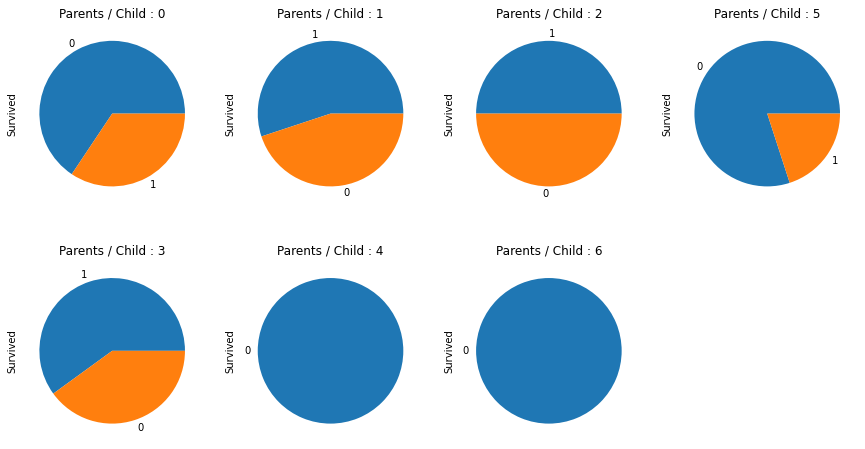

In [17]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in data_train['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    data_train.Survived[data_train['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [18]:
data_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [19]:
data_test['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9])

In [20]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5,
    9: 6
}
data_train['Parch'] = data_train['Parch'].apply(lambda x: replacement.get(x))
data_test['Parch'] = data_test['Parch'].apply(lambda x: replacement.get(x))

data_train['Parch'] = StandardScaler().fit_transform(data_train['Parch'].values.reshape(-1, 1))
data_test['Parch'] = StandardScaler().fit_transform(data_test['Parch'].values.reshape(-1, 1))


In [21]:
data_train.drop('Ticket', axis=1, inplace=True)
data_test.drop('Ticket', axis=1, inplace=True)

In [22]:
data_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
data_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

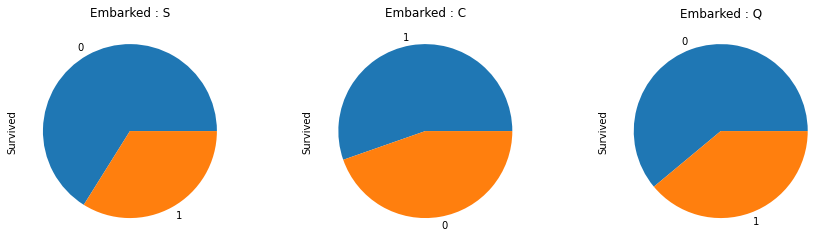

In [24]:
data_train['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in data_train['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    data_train.Survived[data_train['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1

In [25]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

data_train['Embarked'] = data_train['Embarked'].apply(lambda x: replacement.get(x))
data_test['Embarked'] = data_test['Embarked'].apply(lambda x: replacement.get(x))

data_train['Embarked'] = StandardScaler().fit_transform(data_train['Embarked'].values.reshape(-1, 1))
data_test['Embarked'] = StandardScaler().fit_transform(data_test['Embarked'].values.reshape(-1, 1))

data_train.head()['Embarked']

0   -0.585954
1    1.942303
2   -0.585954
3   -0.585954
4   -0.585954
Name: Embarked, dtype: float64

In [26]:
data_test.head()['Embarked']

0    0.470915
1   -0.700767
2    0.470915
3   -0.700767
4   -0.700767
Name: Embarked, dtype: float64

In [27]:
data_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [28]:
data_test['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

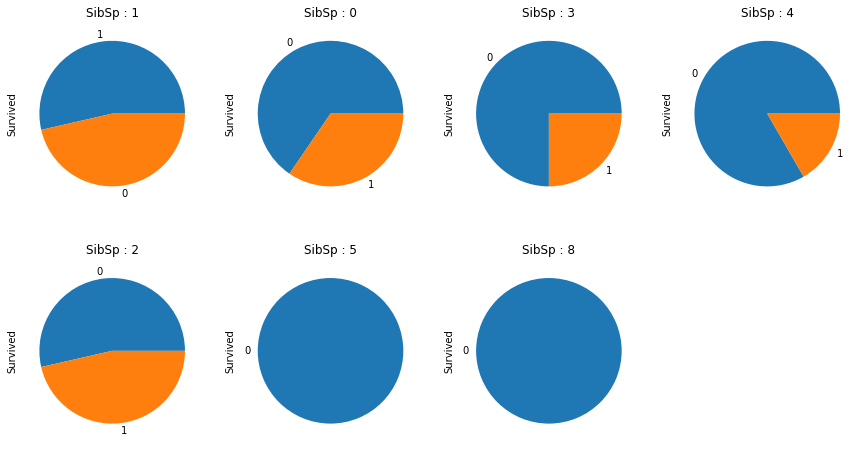

In [29]:
fig = plt.figure(figsize=(15,8))
i = 1
for sibsp in data_train['SibSp'].unique():
    fig.add_subplot(2, 4, i)
    plt.title('SibSp : {}'.format(sibsp))
    data_train.Survived[data_train['SibSp'] == sibsp].value_counts().plot(kind='pie')
    i += 1

In [30]:
replacement = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

data_train['SibSp'] = data_train['SibSp'].apply(lambda x: replacement.get(x))
data_test['SibSp'] = data_test['SibSp'].apply(lambda x: replacement.get(x))

data_train['SibSp'] = StandardScaler().fit_transform(data_train['SibSp'].values.reshape(-1, 1))
data_test['SibSp'] = StandardScaler().fit_transform(data_test['SibSp'].values.reshape(-1, 1))

data_train.head()['SibSp']

0    1.576109
1    1.576109
2   -0.396241
3    1.576109
4   -0.396241
Name: SibSp, dtype: float64

In [31]:
data_test.head()['SibSp']

0   -0.525887
1    1.538159
2   -0.525887
3   -0.525887
4    1.538159
Name: SibSp, dtype: float64

In [32]:
data_train['Cabin'].fillna('U', inplace=True)
data_test['Cabin'].fillna('U', inplace=True)

data_train['Cabin'] = data_train['Cabin'].apply(lambda x: x[0])
data_test['Cabin'] = data_test['Cabin'].apply(lambda x: x[0])

data_train['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [33]:
data_test['Cabin'].unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

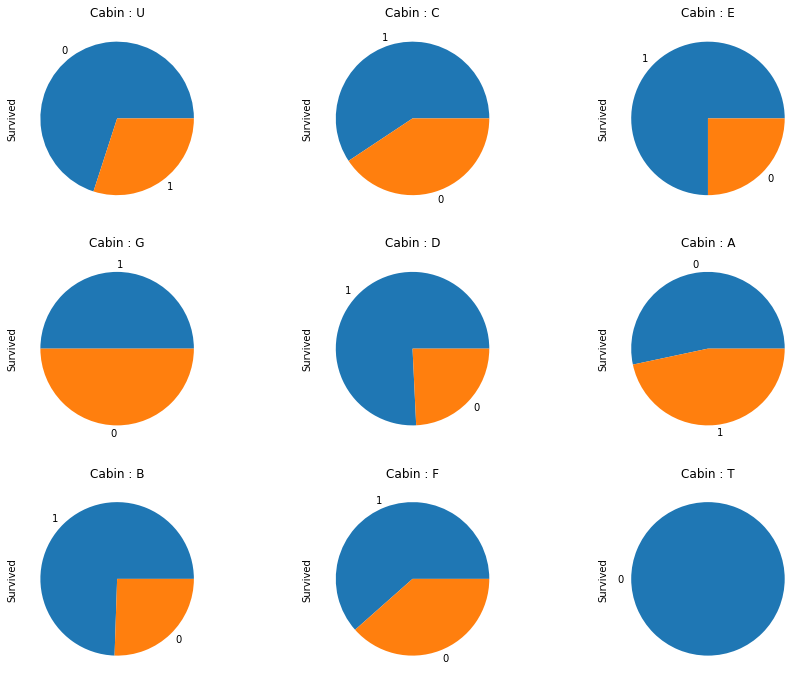

In [34]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in data_train['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(cabin))
    data_train.Survived[data_train['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [35]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

data_train['Cabin'] = data_train['Cabin'].apply(lambda x: replacement.get(x))
data_train['Cabin'] = StandardScaler().fit_transform(data_train['Cabin'].values.reshape(-1, 1))
data_train.head()['Cabin']

0   -0.494813
1    0.960231
2   -0.494813
3    0.960231
4   -0.494813
Name: Cabin, dtype: float64

In [36]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

data_test['Cabin'] = data_test['Cabin'].apply(lambda x: replacement.get(x))
data_test['Cabin'] = StandardScaler().fit_transform(data_test['Cabin'].values.reshape(-1, 1))
data_test.head()['Cabin']

0   -0.478344
1   -0.478344
2   -0.478344
3   -0.478344
4   -0.478344
Name: Cabin, dtype: float64

In [37]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.557420,1.576109,-0.468807,-0.502445,-0.494813,-0.585954
1,1,-1.566107,1.537975,0,0.649410,1.576109,-0.468807,0.786845,0.960231,1.942303
2,1,0.827377,1.070922,0,-0.255712,-0.396241,-0.468807,-0.488854,-0.494813,-0.585954
3,1,-1.566107,1.537975,0,0.423129,1.576109,-0.468807,0.420730,0.960231,-0.585954
4,0,0.827377,-0.797294,1,0.423129,-0.396241,-0.468807,-0.486337,-0.494813,-0.585954


In [38]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0.873482,-0.819966,1,0.363039,-0.525887,-0.444791,-0.497071,-0.478344,0.470915
1,893,0.873482,1.486533,0,1.323727,1.538159,-0.444791,-0.511934,-0.478344,-0.700767
2,894,-0.315819,-0.819966,1,2.476554,-0.525887,-0.444791,-0.463762,-0.478344,0.470915
3,895,0.873482,-0.819966,1,-0.213374,-0.525887,-0.444791,-0.482135,-0.478344,-0.700767
4,896,0.873482,1.486533,0,-0.597649,1.538159,2.084770,-0.417159,-0.478344,-0.700767


In [39]:
from sklearn.model_selection import train_test_split
survived = data_train['Survived']
data_train.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data_train, survived, test_size=0.2, random_state=42)

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.8324022346368715
0.8156424581005587


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [41]:
# # data_test.to_csv('test1.csv', index=False)
# os.remove('../working/test1.csv')
# os.remove('../working/test.csv')

In [42]:
test_x  = data_test.drop("PassengerId",axis=1).copy()

In [43]:
test_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.873482,-0.819966,1,0.363039,-0.525887,-0.444791,-0.497071,-0.478344,0.470915
1,0.873482,1.486533,0,1.323727,1.538159,-0.444791,-0.511934,-0.478344,-0.700767
2,-0.315819,-0.819966,1,2.476554,-0.525887,-0.444791,-0.463762,-0.478344,0.470915
3,0.873482,-0.819966,1,-0.213374,-0.525887,-0.444791,-0.482135,-0.478344,-0.700767
4,0.873482,1.486533,0,-0.597649,1.538159,2.084770,-0.417159,-0.478344,-0.700767


In [44]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_final = random_forest.predict(test_x)
random_forest.score(X_train, y_train)

0.9831460674157303

In [45]:
# print(len(y_pred_final))

In [46]:
submission = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': y_pred_final})
submission.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
